# Titanic Data Analysis

I will be investigating the titanic dataset for this project.  Before I begin, let me discuss a few disclaimers:

1) The population of the dataset is a fraction of the total people aboard in the titanic. In other words, 2,238 people were aboard of the titanic (according to wikipedia). However, this data set contains 891 passengers. In tis study, I will use 891 as a population.

2) In the dataset, you will see the main passenger with the names in parenthesis. The names inside the parenthesis  are the main passenger's companion whether it is a parent, spouse, child, or sibiling. I will ignore whatever inside the parenthesis. This analysis will be on the main passengers.

Keep those 2 in mind and let's begin! :)

##  Does female who travel with family have higher survival rate then female who travel alone?

From the titanic dataset, females have a higher suvival rate then males. Does  number of families have an impact of the females' survival of the titanic? Does females with out families have a different survival rate than those with families?

Survival rate is the mean of 'Survived' of the dataset.

I am doing a hypothesis test of does the  survival rate of females differs between those with families and those without. The alpha level is 0.05 (confidence level of 95%). 

Females with families: $\mu_{ff}$

Females without families: $\mu_{fo}$

$H_0$= The survival rate of females with families  and  of female without families are the same. 
$\mu_{ff}$=$\mu_{fo}$

$H_A$= The survival rate of females with families  and  of female without families are different.
$\mu_{ff}$$\neq$$\mu_{fo}$

In [383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

## Titanic Dataset

Let's see  what this dataset is about. I will explore the statisitcs of the titanic dataset  first before exploring the female portion of the dataset.

In [384]:
titanic = pd.read_csv('titanic-data.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [385]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In the titanic dataset, the  average  Pclass is 2.3, average age is 29.7, and  average fare is 32.2. 

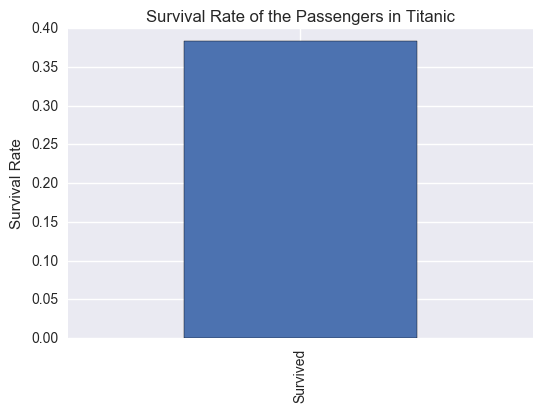

In [386]:
%matplotlib inline
what = titanic[['Survived']].mean().plot(kind='bar')
what.set(ylabel='Survival Rate')
plt.title('Survival Rate of the Passengers in Titanic')

From the bar graph above, less than 40% of the passengers survived from the titanic.

In the titanic dataset, we know the following:

Population: 891

$\mu_S$ (Surival rate)  = 39%

Average age =29.7 years

Average fare paid = 32.2

Average Pclass = 2.3

### Cleaning up the Data

I am cleaning up the data to make the analysis alot smoother (without errors) and  in preparation for hypothesis test.

There are missing values in the dataset: Cabin, Embarked, Age, and  Fare. Here's how I fill them:

1) **Cabin:** I filled in NaN values with 'U' for unknown . I couldn't predict where passenger reside in cabin. 

2) **Embarked:** I filled in with 'U' for unknown. Passengers from different ports buys Pclass tickets at various fares so it is difficult to guess what city the passenger embarked from.

3) **Age:** I filled in by average age. Without the values, I won't be able to do the statistical test. There are 177 rows of data that have Nan Age values. So deleting them is not an option. Filling in data with min or max age will screw up the statistics of the dataset. So, I used the mean age since it won't have a huge affect on the statistical analysis in comparison to use a min or max age.

4) **Fare:**fill in Nan values with mean fare price. Within each cabin, people resides in various cabins (paid various fares) no matter which Pclass they are in. Hence, I put in mean fare price.

**In addition to filling Nan values: I also made the following changes:**

1) Convert strings into integers in the "Age" column.

2) Combine siblings, parents, spouses, and children into a new column: "Family".

3) Dropped 'SibSp' and 'Parch' columns.

See the code below.

In [387]:
#Clean up the data types in the titanic dataframe.

titanic['Cabin']= titanic.Cabin.fillna('U') 
titanic['Embarked']= titanic.Embarked.fillna('U')
titanic['Age']= titanic.Age.fillna(titanic.Age.mean()) 
titanic['Fare']= titanic.Fare.fillna(titanic.Fare.mean()) 
titanic.Age = titanic.Age.astype(int) 
titanic['Family'] = titanic['SibSp']+titanic['Parch'] 
titanic.drop(['SibSp','Parch'], axis=1, inplace=True) 
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,U,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,U,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,U,S,0


### Creating the Dataframes and setting up equations for the analysis

I am creating the dataframe of females who  traveled with family  and females who traveled alone.

In [388]:
female = titanic[titanic['Sex']=='female']
female.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,U,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,C123,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,347742,11.1333,U,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,237736,30.0708,U,C,1


In [389]:
female.describe()

,PassengerId,Survived,Pclass,Age,Fare,Family
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,431.028662,0.742038,2.159236,28.089172,44.479818,1.343949
std,256.846324,0.438211,0.857290,12.877836,57.997698,1.755733
min,2.000000,0.000000,1.000000,0.000000,6.750000,0.000000
25%,231.750000,0.000000,1.000000,21.000000,12.071875,0.000000
50%,414.500000,1.000000,2.000000,29.000000,23.000000,1.000000
75%,641.250000,1.000000,3.000000,35.000000,55.000000,2.000000
max,889.000000,1.000000,3.000000,63.000000,512.329200,10.000000


From above, we know the following about the female dataset:

Survival rate = 0.74 (which is higher than the titanic dataset.)

Average Pclass = 2.16

Average age = 28 years

Average fare = 44.48

Let's see the visualization among the survival rate of females across all ages:


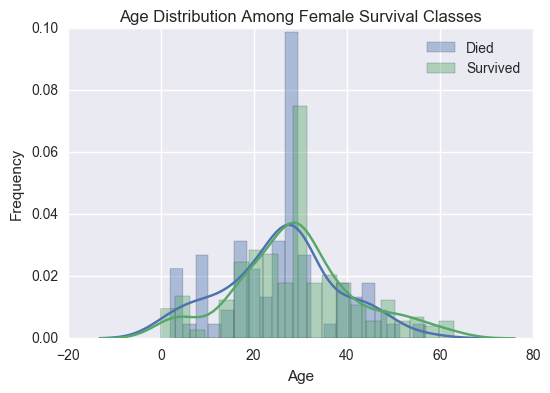

In [390]:
sns.distplot(female.loc[(female['Survived']==0), 'Age'], bins=20)
sns.distplot(female.loc[(female['Survived']==1), 'Age'], bins=20)
plt.title('Age Distribution Among Female Survival Classes')
plt.ylabel('Frequency')
plt.legend(['Died', 'Survived'])

As you can see,  there is a spike in the distribution of female survival passengers when the 'Age' is between 20 and 40, indicating that women in their 20s-40s have the higher survival rate.

### Let's create the dataframes :)

In [391]:
family = female[female['Family']!=0]
no_family = female[female['Family']==0]

In [392]:
family.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C85,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,C123,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,347742,11.1333,U,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,237736,30.0708,U,C,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,PP 9549,16.7000,G6,S,2


In [393]:
family.shape

(188, 11)

There are 188 females who were with families  in the titanic.

In [394]:
no_family.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,U,S,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,113783,26.5500,C103,S,0
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,350406,7.8542,U,S,0
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55,248706,16.0000,U,S,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,29,2649,7.2250,U,C,0


In [395]:
no_family.shape

(126, 11)

There are 126 females who were alone in the titanic.

### Functions

The functions I will be using in my data analysis are shown  below.

In [396]:
def ttest(a,b):
    '''This function does the ttest of the survival rates between datasets a and b with the 95% confidence level. 
        '''
    t =scipy.stats.ttest_ind(a['Survived'],b['Survived'], equal_var=False)
    return t

def survival_rate(n):
    '''This function will calculate the mean of # survived of a subclass compared to the titanic population'''
    dead, alive = n['Survived'].value_counts()
    #print dead, 'died'
    #print alive, 'alive'
    return float(alive)/float(dead)

def stats(data):
    '''Summarize the given data'''
    print 'Mean:', np.mean(data)
    print 'Variance', np.var(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)

### Hypothesis Testing

I am doing a hypothesis test of does the  survival rate of females differs between those with families and those who are alone. The alpha level is 0.05 (confidence level of 95%). 

In [397]:
ttest(family,no_family)

Ttest_indResult(statistic=-1.4762649018944958, pvalue=0.1409770087293242)

Since the pvalue is greater than 0.05, then I fail to reject the null.  From this ttest,  females with families and without families have the same  survival rate.

Hence, $\mu_{ff}$=$\mu_{fo}$

##  But why?

I will investigate further as to why they have the same survival rate.  

In [398]:
stats(family['Survived'])

Mean: 0.712765957447
Variance 0.204730647352
Standard deviation: 0.452471708897
Minimum: 0
Maximum: 1


In [399]:
stats(no_family['Survived'])

Mean: 0.785714285714
Variance 0.168367346939
Standard deviation: 0.410325903324
Minimum: 0
Maximum: 1


From using my stats function, these two groups have very similar means, variances, and standard deviation.  I will use graphs  to see  any differences.

## Are there any survival rate differences by how many family members that traveled with the females?

I will investigate to see if different numbers of family members have different survival rates for main female passengers. Let's look at the graphs below.

In [400]:
%matplotlib inline

[<matplotlib.text.Text at 0x1249085d0>, <matplotlib.text.Text at 0x111acc1d0>]

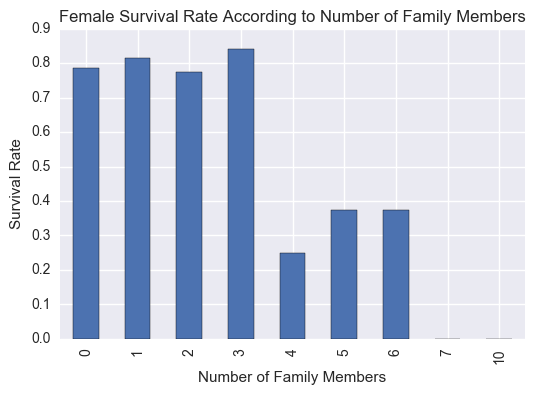

In [401]:
w = female.groupby('Family').mean()['Survived'].plot(kind='bar', title='Female Survival Rate According to Number of Family Members')
w.set(ylabel='Survival Rate', xlabel="Number of Family Members")
#The w formula is from Ashutosh Singh from our one-one session 4/4/17.

From the graph above, it shows that the survival rate is the same for females with family (family >0)and female without family(family=0). The survival rate decreases starting at females  with 4 or more family members.
The surival rates are shown below.

In [402]:
female.groupby('Family').mean()['Survived']

Family
0     0.785714
1     0.816092
2     0.775510
3     0.842105
4     0.250000
5     0.375000
6     0.375000
7     0.000000
10    0.000000
Name: Survived, dtype: float64

Females with family of 4 have a survival rate of 25%. Family of 5 and 6 are 37.5%.

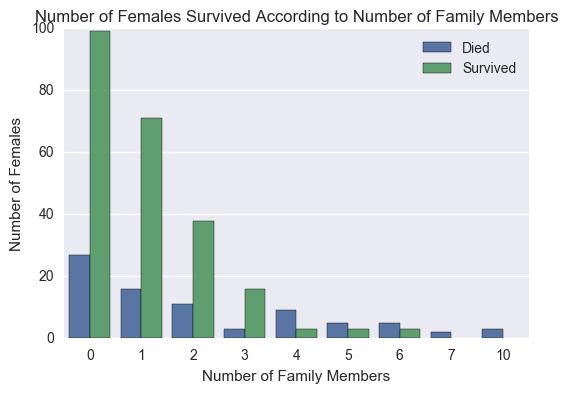

In [403]:
new_df = female.groupby(['Family','Survived']).count().reset_index()
yay = sns.barplot(x='Family', y='PassengerId', hue='Survived', data=new_df)
yay.set(ylabel='Number of Females' , xlabel="Number of Family Members")
plt.title('Number of Females Survived According to Number of Family Members')
handles, labels = yay.get_legend_handles_labels()
yay.legend(handles, ["Died","Survived"], loc='upper right')
plt.show()
#This formula I got is from Ashutosh Singh from our one-to-one session 4/4/17.

This above graph shows a positive skewed distribution where the number of females survived are those without family and decreases as the family members increase. The number of females with families of 4 or more who died are higher rate than those who survived.

In [404]:
four_or_more = female[female['Family']>=4]
four_or_more.describe()

,PassengerId,Survived,Pclass,Age,Fare,Family
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,443.454545,0.272727,2.696970,23.575758,61.129927,5.454545
std,271.915324,0.452267,0.683961,14.517296,77.257575,1.733690
min,25.000000,0.000000,1.000000,2.000000,7.925000,4.000000
25%,181.000000,0.000000,3.000000,9.000000,25.466700,4.000000
50%,438.000000,0.000000,3.000000,24.000000,31.275000,5.000000
75%,643.000000,1.000000,3.000000,29.000000,46.900000,6.000000
max,886.000000,1.000000,3.000000,54.000000,263.000000,10.000000


Females who traveled with family of 4 or more stats:

Population : 33 (which is  10.5% of the total female population)

Survival Rate = 27%

Average Pclass = 2.7

Average age = 23.6 years

Average fare = 61.13

### So...
The survival rate difference are very minimal for females with families of 3 or less. However, it is significant for females with famiies 4 or more.

## But what about Pclass? Does it make a difference?

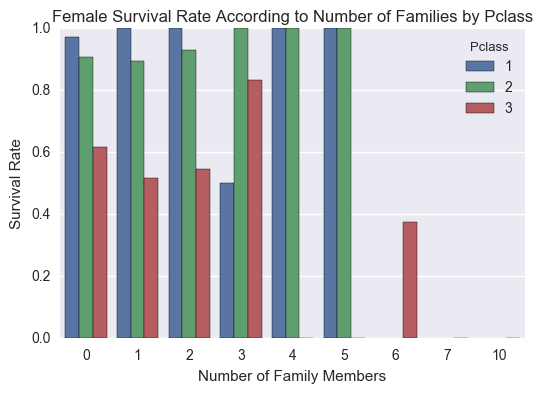

In [405]:
pclass_df = female.groupby(['Family','Pclass']).mean().reset_index()
pug = sns.barplot(x='Family', y='Survived', hue='Pclass', data=pclass_df).set(ylabel='Survival Rate', xlabel='Number of Family Members')
plt.title('Female Survival Rate According to Number of Families by Pclass')

Not necessarily so for Pclass 1 and 2. However, Pclass 3 has a different story. Based on the graph above, the survival rate of females of Pclass 3 is much lower in comparison to Pclass 1 and 2 regardless the number of family members who were with them. Let's see the statistics of Pclass 3.

In [406]:
Pclass3 = female[female['Pclass']==3]
Pclass3.describe()

,PassengerId,Survived,Pclass,Age,Fare,Family
count,144.000000,144.000000,144.0,144.000000,144.000000,144.000000
mean,399.729167,0.500000,3.0,23.847222,16.118810,1.694444
std,267.232416,0.501745,0.0,11.220809,11.690314,2.232242
min,3.000000,0.000000,3.0,0.000000,6.750000,0.000000
25%,165.250000,0.000000,3.0,18.000000,7.854200,0.000000
50%,376.000000,0.500000,3.0,28.000000,12.475000,1.000000
75%,636.000000,1.000000,3.0,29.000000,20.221875,2.000000
max,889.000000,1.000000,3.0,63.000000,69.550000,10.000000


Population = 144 (which is 46% of the total female population)

Survival Rate = 50%

Average  Age = 24 years

Average Fare = 16.12

There is a difference in Pclass 3  in comparison to Pclass 1 and 2. 

## How about location?

Let's see if different locations have different survival rates.

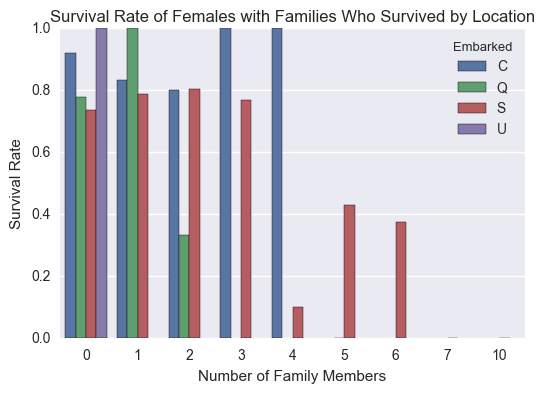

In [407]:
location = female.groupby(['Family','Embarked']).mean().reset_index()
sns.barplot(x='Family', y='Survived', hue='Embarked', data=location).set(ylabel='Survival Rate',xlabel='Number of Family Members')
plt.title('Survival Rate of Females with Families Who Survived by Location')

There is a difference between  locations. C is Cherbourg, Q is Queenstown, S is Southampton, and U is unknown. Females embarked from Cherbourg has the highest survival rate. Females embarked from Southampton has the lowest survival rate. 

## How about male  passengers? Does males travel with at least 1 family member in the titanic more likely to survive than males  with no one?

[<matplotlib.text.Text at 0x12ba10610>, <matplotlib.text.Text at 0x12b8791d0>]

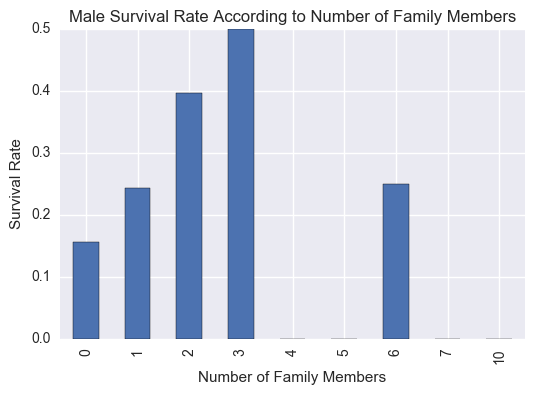

In [408]:
male = titanic[titanic['Sex']=='male']
m = male.groupby('Family').mean()['Survived'].plot(kind='bar', title='Male Survival Rate According to Number of Family Members')
m.set(ylabel='Survival Rate', xlabel="Number of Family Members")

As you can see, male passengers with 3 family members have the highest survival rate. Unlike female passengers, male passengers with no family members are less likely to survive in comparison to males with 1,2, and 3 family members.  

## Conclusion

Females  with and without families have similar survival rates. The number of family members does not have an impact of the surivial rate of females regardless of Pclass and location. Females in the following situations have a lower survival rate : families of 4 or more, Pclass 3, and embarked from Southampton.


## My thoughts for future analysis

I would like to do the analyis of the family members who were with the main passenger. The missing feature is to separate all companions from the main passenger  and have data corresponding to those names. It's easier to do analysis of each member of the family who were aboard on the titanic and figure out who survived  or died.

I can fully trust the statistical analysis because it shows that the majority females regardless of how many family members they traveled with survived from the sinking of the titanic. But I would like to do a further analysis of the family members who traveled with the femalepassenger. For example, do they  survive regardless if the female passenger survived or not?